**Problem Statement: Predicting Diabetes Risk Using CDC Health Indicators**

**Research Question:**  
Can machine learning models accurately classify individuals as healthy, pre-diabetic, or diabetic using demographic, lifestyle, and clinical risk indicators from the CDC Diabetes Health Indicators dataset?

**Expected Data Source:**  
The project will use the CDC Diabetes Health Indicators dataset available from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators and linked documentation from the CDC (https://www.cdc.gov/brfss/annual_data/annual_2014.html).

### 1. Data Analyis
In this section, we will perform data analysis and cleansing. 

In [68]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')
# set seaborn style
sns.set(style='whitegrid')
# set random seed for reproducibility
np.random.seed(112)

In [69]:
!pip3 install -U ucimlrepo

from ucimlrepo import fetch_ucirepo 

In [70]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [71]:
# variable information 
md = cdc_diabetes_health_indicators.variables

print(type(md))
print(md)

<class 'pandas.core.frame.DataFrame'>
                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDo

In [72]:
# Dispaly name, type, description, and missing_values of each row of md dataframe
for index, row in md.iterrows():
    print(f"{index+1}.Name: {row['name']}; Type: {row['type']}; Missing Values: {row['missing_values']}")
    print(f"Description: {row['description']}") 
    print("\n")




1.Name: ID; Type: Integer; Missing Values: no
Description: Patient ID


2.Name: Diabetes_binary; Type: Binary; Missing Values: no
Description: 0 = no diabetes 1 = prediabetes or diabetes


3.Name: HighBP; Type: Binary; Missing Values: no
Description: 0 = no high BP 1 = high BP


4.Name: HighChol; Type: Binary; Missing Values: no
Description: 0 = no high cholesterol 1 = high cholesterol


5.Name: CholCheck; Type: Binary; Missing Values: no
Description: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years


6.Name: BMI; Type: Integer; Missing Values: no
Description: Body Mass Index


7.Name: Smoker; Type: Binary; Missing Values: no
Description: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes


8.Name: Stroke; Type: Binary; Missing Values: no
Description: (Ever told) you had a stroke. 0 = no 1 = yes


9.Name: HeartDiseaseorAttack; Type: Binary; Missing Values: no
Description: coronary heart disease (CHD) or m

In [73]:
### Let's explore the dataset
# combine features and target into a single dataframe
df = pd.concat([X, y], axis=1)
# display first few rows of the dataframe
print(df.head())
# display summary statistics of the dataframe
print(df.describe())

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0  

In [74]:
# For GenHlth, the current scale is 1-5, where 1 is Excellent and 5 is Poor.
# Let's reverse the scale so that higher values indicate better health.
df['GenHlth'] = df['GenHlth'].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})


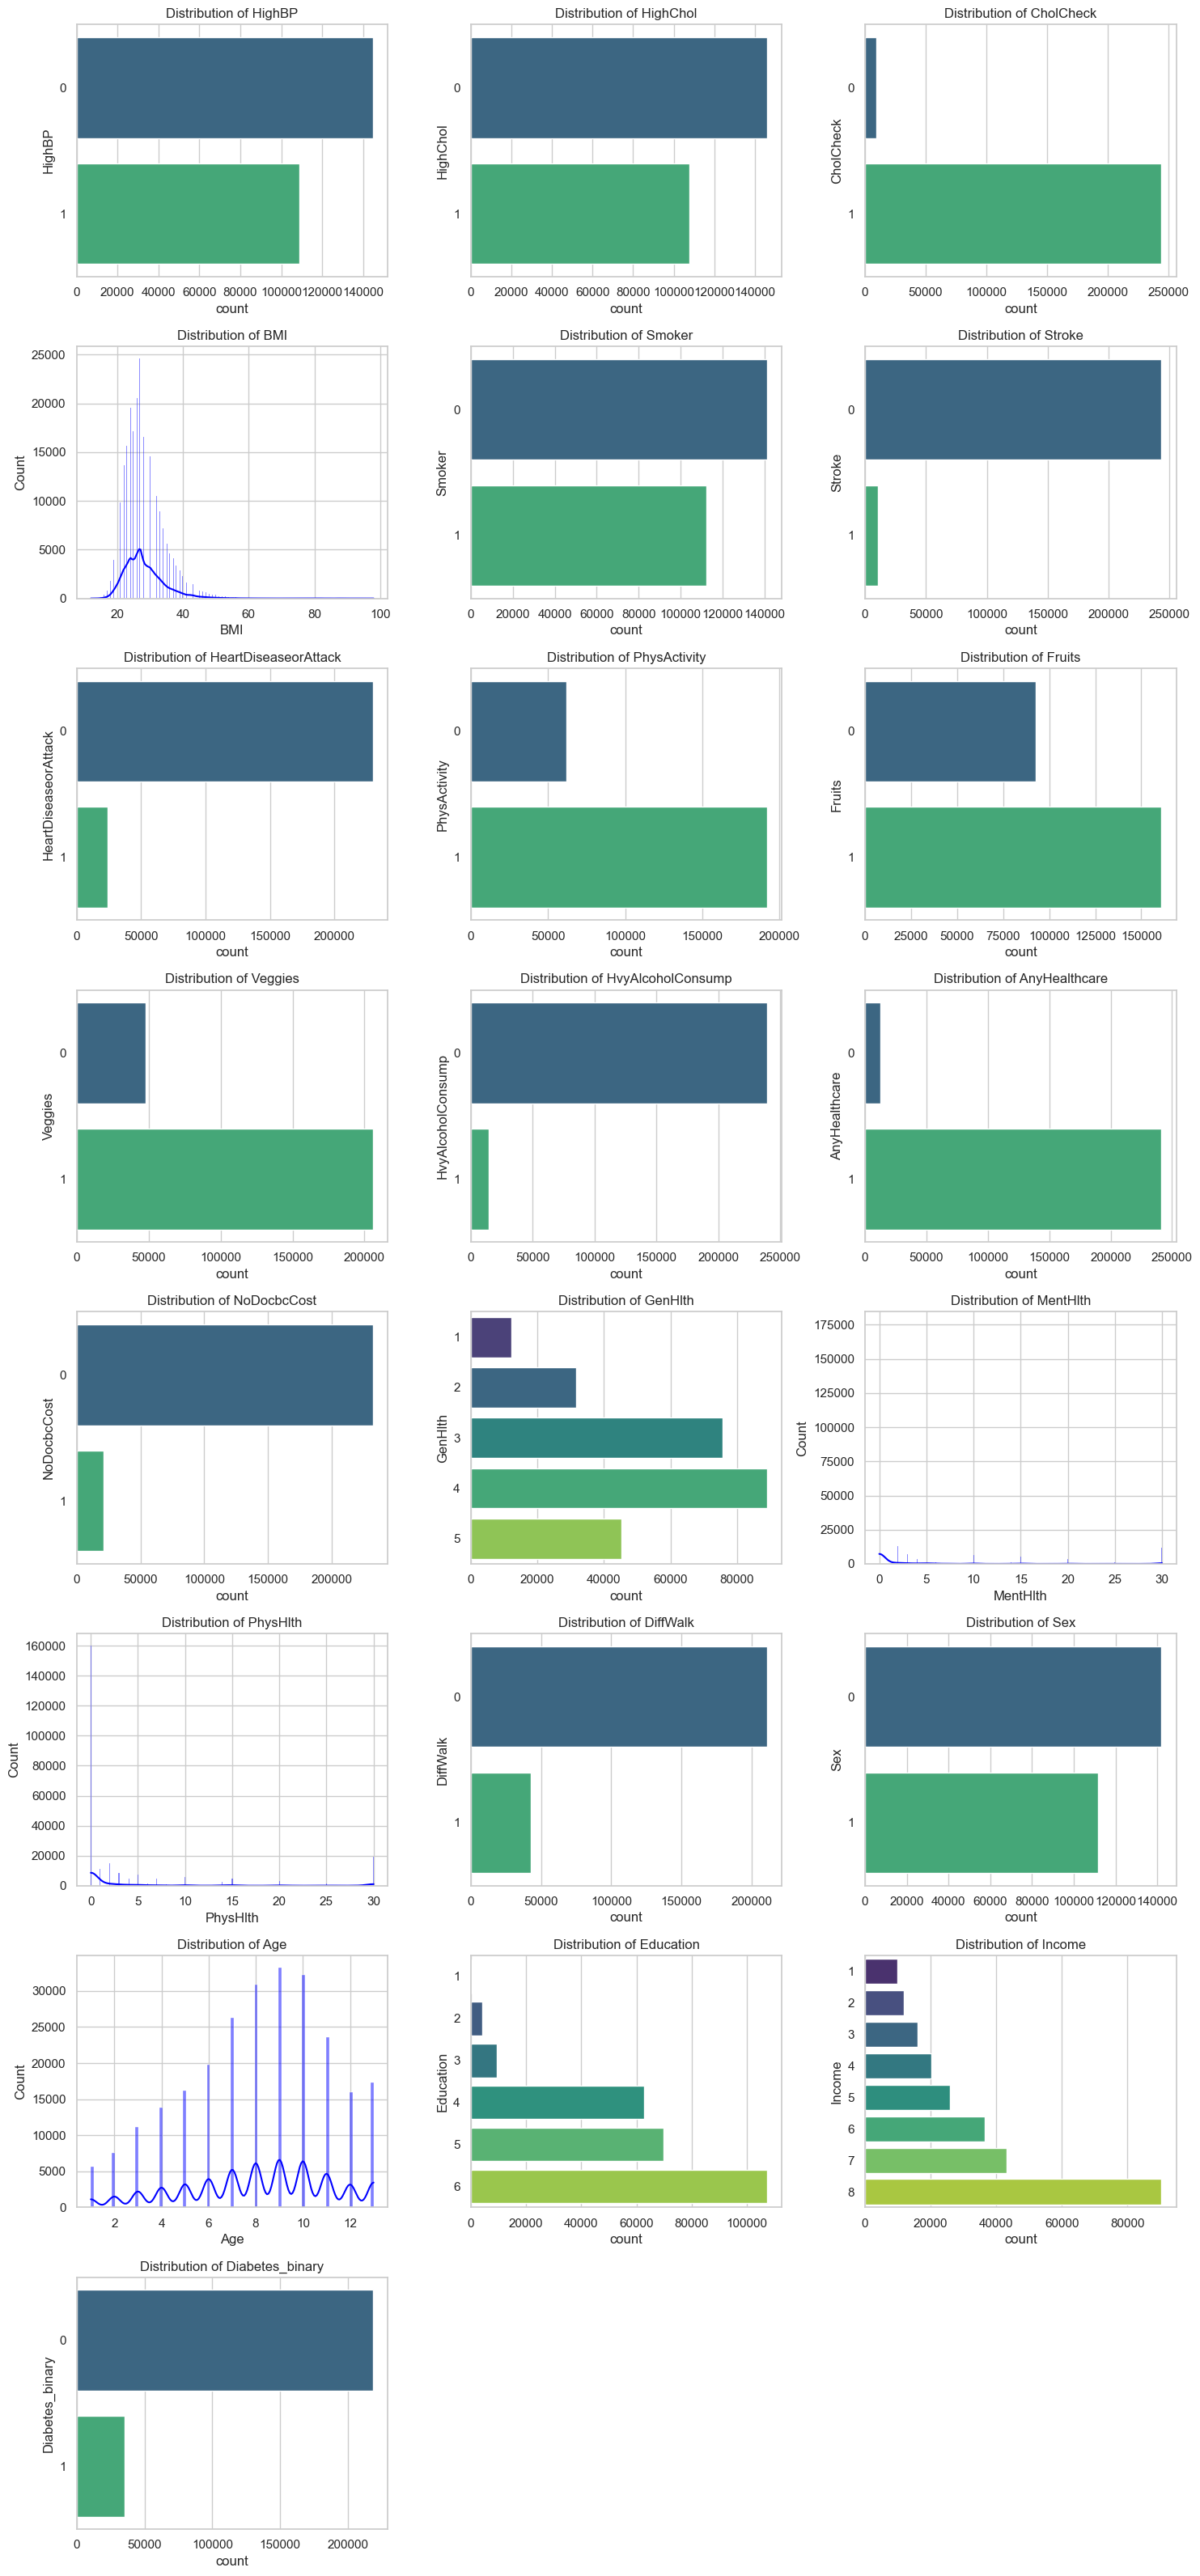

In [75]:
# Create univariate plots for each feature in a grid layout
num_features = df.shape[1]
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 4))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    if df[column].dtype == 'object' or len(df[column].unique()) < 10:
        sns.countplot(y=df[column], palette='viridis')
    else:
        sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
# save the figure
plt.savefig('images/univariate_plots.png')
plt.show()

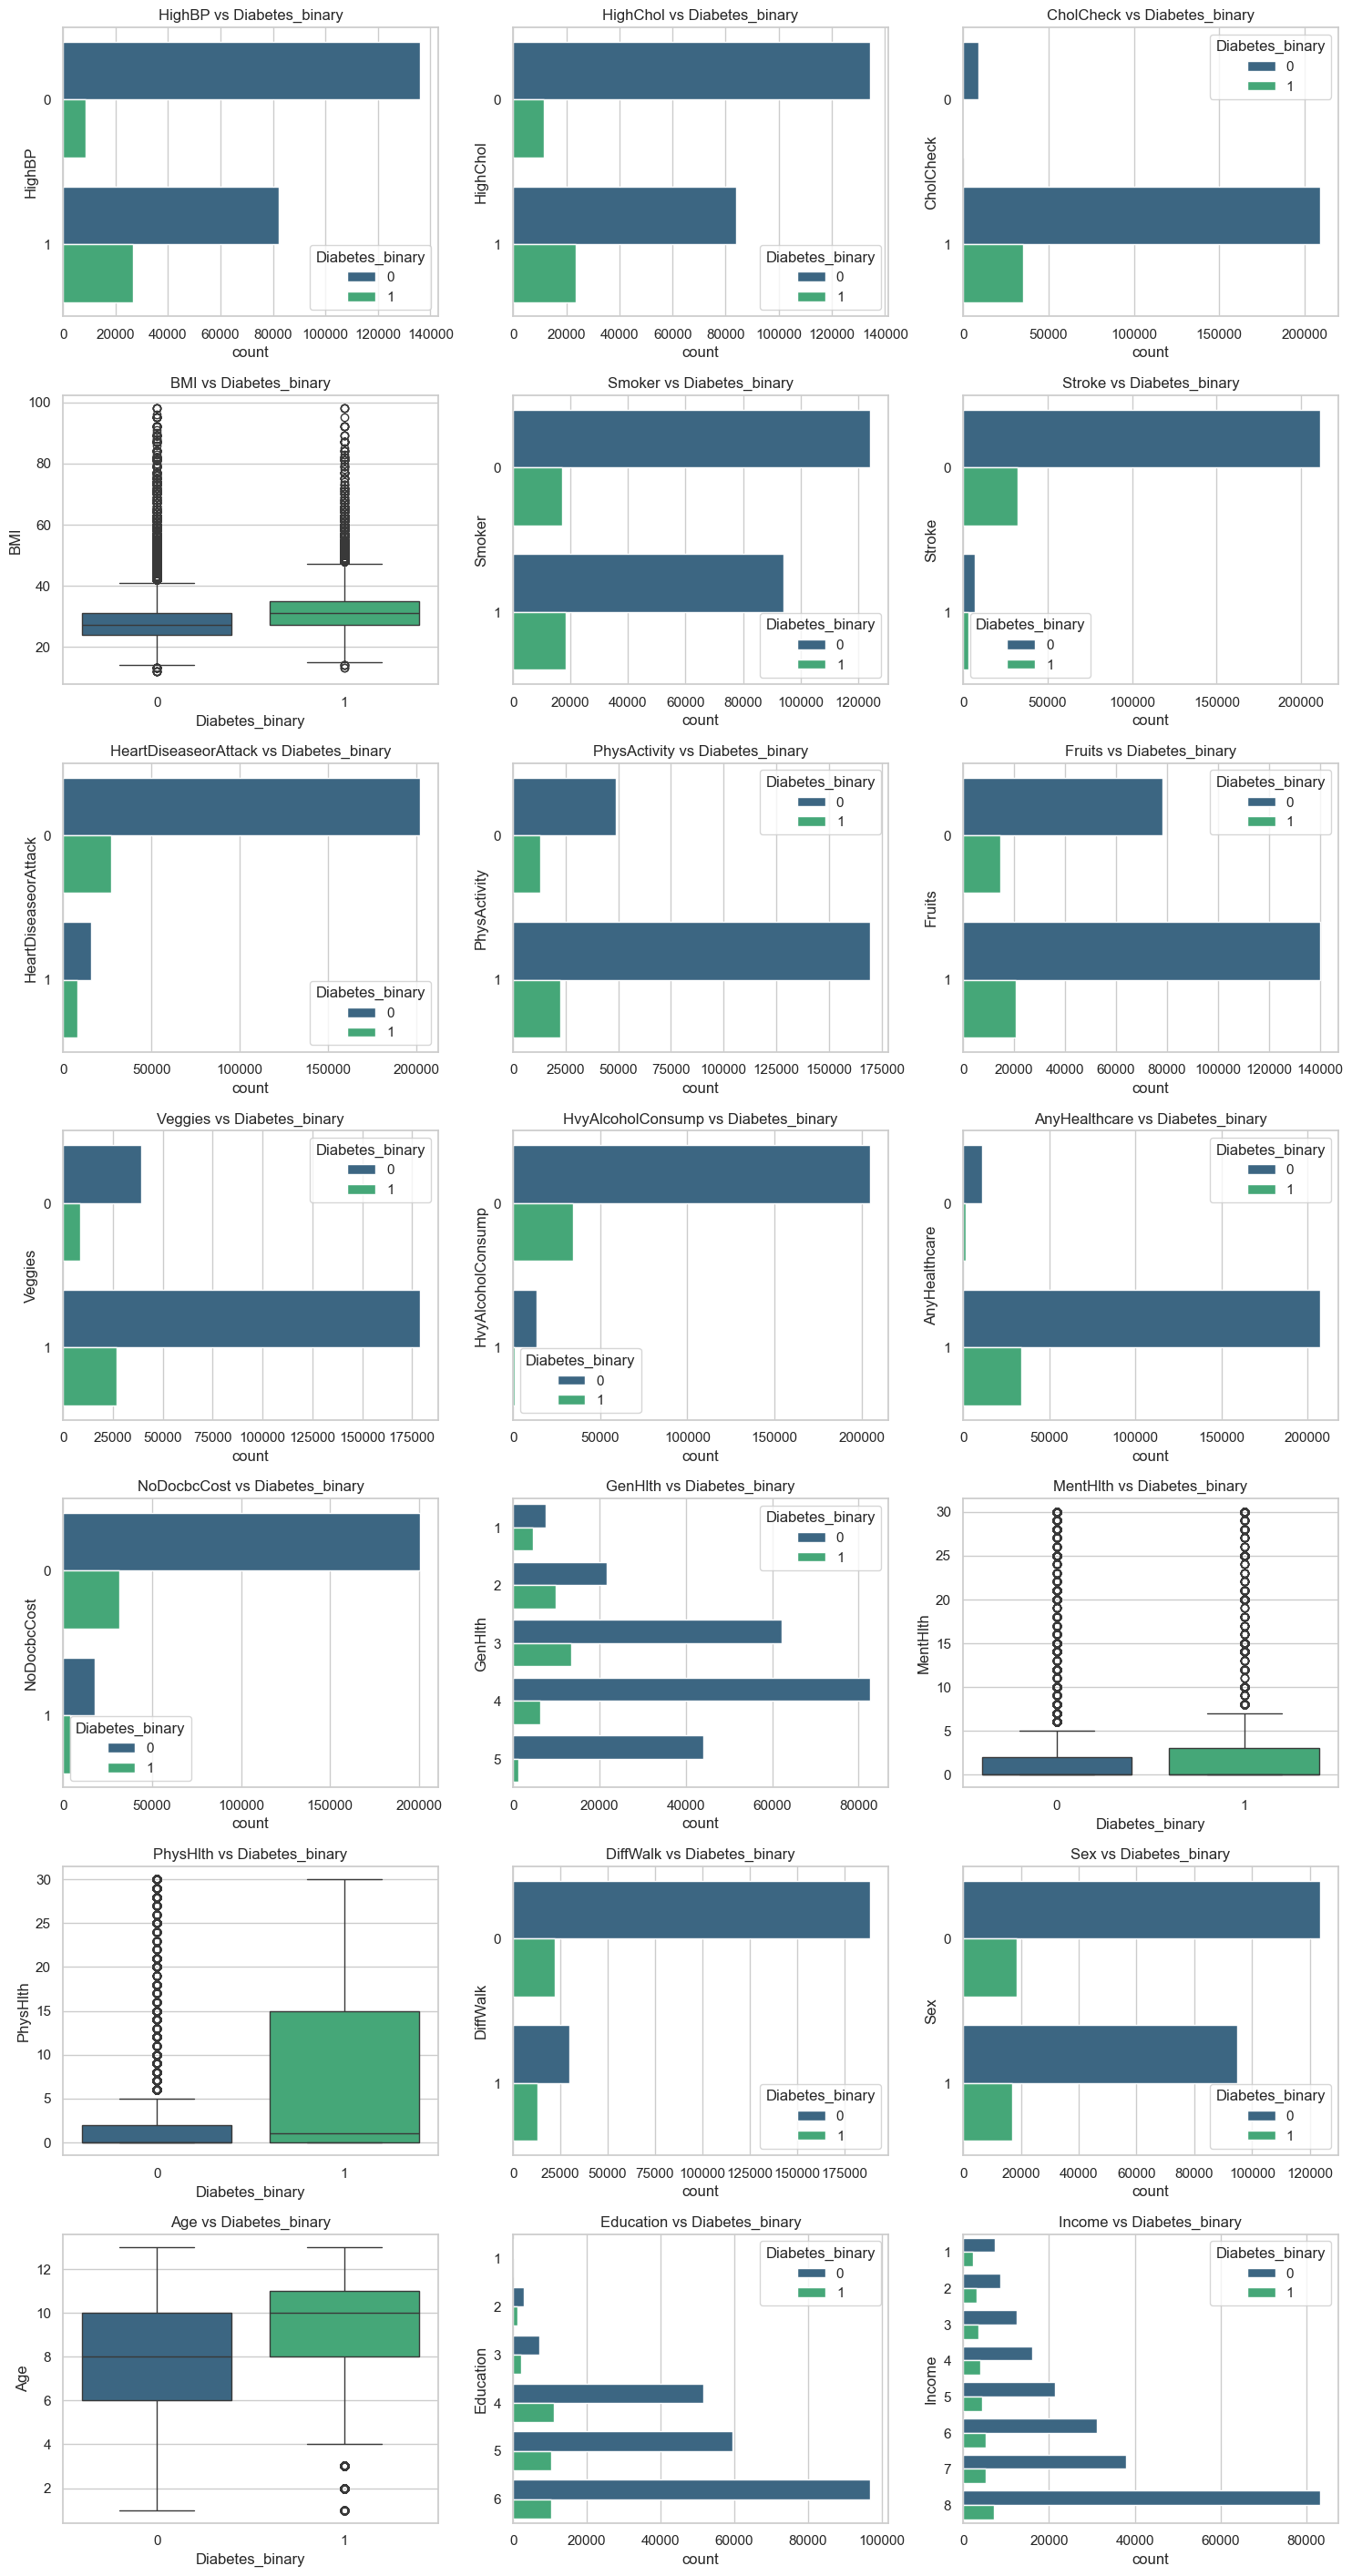

In [76]:
# Create bivariate plots for each feature against the target variable in a grid layout
target_variable = y.columns[0]
plt.figure(figsize=(15, num_rows * 4))
for i, column in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    if X[column].dtype == 'object' or len(X[column].unique()) < 10:
        sns.countplot(y=df[column], hue=df[target_variable], palette='viridis')
    else:
        sns.boxplot(x=df[target_variable], y=df[column], palette='viridis')
    plt.title(f'{column} vs {target_variable}')
    plt.tight_layout()
# save the figure
plt.savefig('images/bivariate_plots.png')
plt.show()

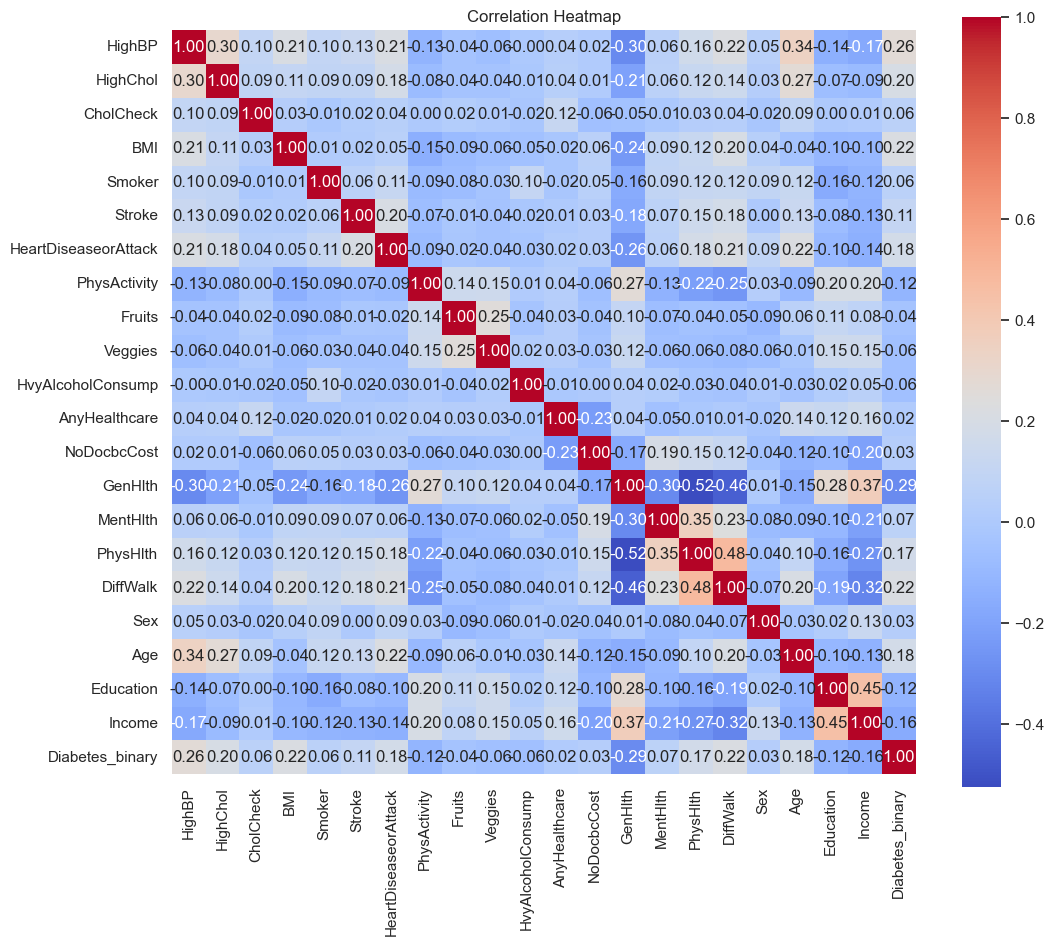

In [77]:
# Create a correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
# save the figure
plt.savefig('images/correlation_heatmap.png')
plt.show()

In [78]:
# display correlation value of each feature with the target variable
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)
print("Correlation of each feature with the target variable:")
print(correlation_with_target)

Correlation of each feature with the target variable:
Diabetes_binary         1.000000
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
GenHlth                -0.293569
Name: Diabetes_binary, dtype: float64


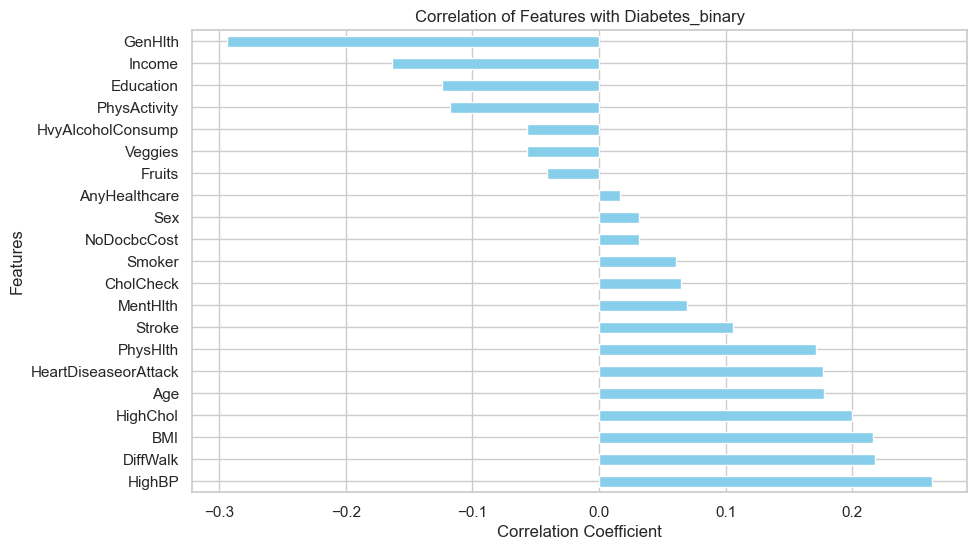

In [79]:
# Visualize the correlation of each feature with the target variable using a horizontal bar plot
plt.figure(figsize=(10, 6))
correlation_with_target.drop(target_variable).plot(kind='barh', color='skyblue')
plt.title(f'Correlation of Features with {target_variable}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
# save the figure
plt.savefig('images/correlation_with_target.png')
plt.show()

### 2. Data Preparation
In this section, we will prepare data for our models. Looking at our univariate analysis,
- Most variables in the dataset are binary (0/1) indicators. We will keep them as is.
- Continuous variables like `BMI`, `MentHlth`, and `PhysHlth` have discreet values distributed over a range. `BMI` is normally distributed, so we will apply Standard Scaler. `MentHlth` and `PhysHlth` are not normal distrubution. Also, their values shows number of days in last 30 days. We will keep them as is.
- Age, Education, and Income are categorical values providing range for each feature. It currently uses an ordinal scale starting from 1 and incrementing by 1 for the next level. Some of the models may make a questionable assumption that the difference between two levels is the same between each consecutive level if we use this scale. In order to be very clear, we will one-hot encoding.

In [80]:
# Apply standard scaling to BMI and One-Hot encoding to Age, Education, and Income
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['BMI']),
        ('cat', OneHotEncoder(), ['Age', 'Education', 'Income'])
    ], remainder='passthrough'
)
# Fit and transform the data
X_processed = preprocessor.fit_transform(X)
# Convert the processed data back to a DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
print(X_processed_df.head())
# display the shape of the processed dataframe
print(X_processed_df.shape)

   num__BMI  cat__Age_1  cat__Age_2  cat__Age_3  cat__Age_4  cat__Age_5  \
0  1.757936         0.0         0.0         0.0         0.0         0.0   
1 -0.511806         0.0         0.0         0.0         0.0         0.0   
2 -0.057858         0.0         0.0         0.0         0.0         0.0   
3 -0.209174         0.0         0.0         0.0         0.0         0.0   
4 -0.663122         0.0         0.0         0.0         0.0         0.0   

   cat__Age_6  cat__Age_7  cat__Age_8  cat__Age_9  ...  remainder__Fruits  \
0         0.0         0.0         0.0         1.0  ...                0.0   
1         0.0         1.0         0.0         0.0  ...                0.0   
2         0.0         0.0         0.0         1.0  ...                1.0   
3         0.0         0.0         0.0         0.0  ...                1.0   
4         0.0         0.0         0.0         0.0  ...                1.0   

   remainder__Veggies  remainder__HvyAlcoholConsump  remainder__AnyHealthcare  \
0    

In [81]:
# With data prepared, let's split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, stratify=y, random_state=112)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")
# Check the distribution of the target variable in training and testing sets
print("Training set target distribution:")
print(y_train[target_variable].value_counts(normalize=True))
print("Testing set target distribution:")
print(y_test[target_variable].value_counts(normalize=True))

Training set shape: (202944, 45), (202944, 1)
Testing set shape: (50736, 45), (50736, 1)
Training set target distribution:
Diabetes_binary
0    0.860666
1    0.139334
Name: proportion, dtype: float64
Testing set target distribution:
Diabetes_binary
0    0.860671
1    0.139329
Name: proportion, dtype: float64


### 3. Baseline Model
What is the baseline accuracy that our classifiers should be aiming to beat?

In [82]:
# Let's find out baseline accuracy by predicting the majority class
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy (majority class): {baseline_accuracy:.2f}")

Baseline accuracy (majority class): 0.86


### 4. Model Preparation
In this section, we will apply and evaluate multiple supervised machine learning algorithm such as Logistic Regression, Random Forest, XGBoost, and Neural Networks.

In [83]:
# Function to perform GridSearchCV and return the best model and capture model train time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train.values.ravel())

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_, grid_search.refit_time_

In [84]:
# Function to evaluate the model and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return accuracy, precision, recall, f1

In [85]:
# Function to generate ROC-AUC curve
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    # save the figure
    plt.savefig('images/roc_curve.png')
    plt.show()
    return roc_auc


In [86]:
# Function to generate Precision-Recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
def plot_precision_recall_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    # save the figure
    plt.savefig('images/precision_recall_curve.png')
    plt.show()
    return avg_precision

In [87]:
# Dictionary to store model results
model_results = {}

In [88]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Define hyper parameter grid
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
log_reg_model = LogisticRegression(max_iter=1000, random_state=112)
best_log_reg, best_params_log_reg, best_score_log_reg, train_time_log_reg = perform_grid_search(log_reg_model, log_reg_param_grid, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Best Parameters: {'C': 0.01, 'solver': 'saga'}
Logistic Regression Best Cross-Validation Score: 0.8648444884757372
Confusion Matrix:
[[42728   939]
 [ 5915  1154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.55      0.16      0.25      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



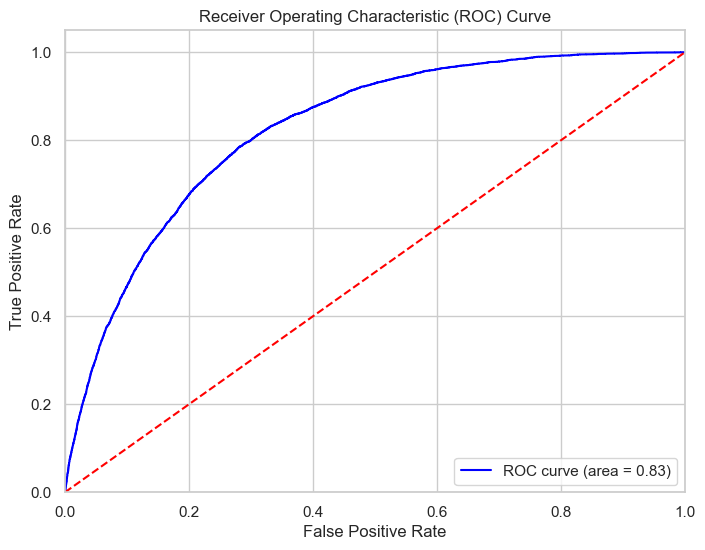

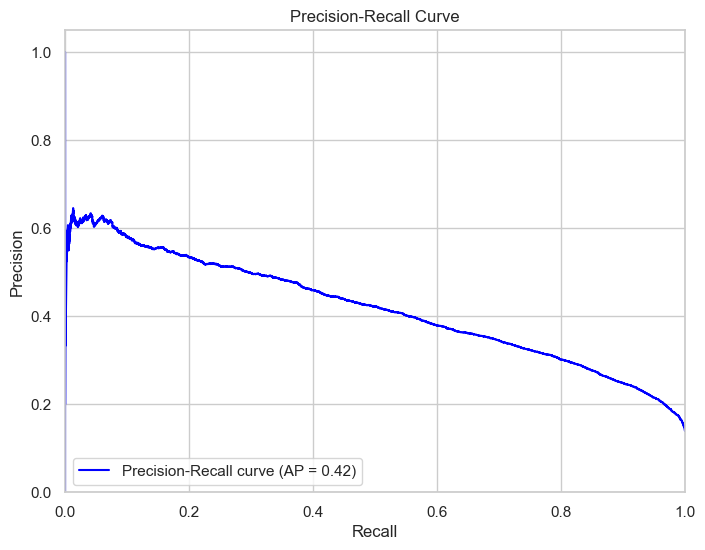

In [89]:
# Print best parameters and best score
print("Logistic Regression Best Parameters:", best_params_log_reg)
print("Logistic Regression Best Cross-Validation Score:", best_score_log_reg)
# Evaluate the model
accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg = evaluate_model(best_log_reg, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_log_reg = plot_roc_curve(best_log_reg, X_test, y_test)
avg_precision_log_reg = plot_precision_recall_curve(best_log_reg, X_test, y_test)
# Store results
model_results['Logistic Regression'] = {
    'Best Parameters': best_params_log_reg,
    'Best CV Score': best_score_log_reg,
    'Train Time (s)': train_time_log_reg,
    'Test Accuracy': accuracy_log_reg,
    'Test Precision': precision_log_reg,
    'Test Recall': recall_log_reg,
    'Test F1-Score': f1_log_reg,
    'ROC AUC': roc_auc_log_reg,
    'Average Precision': avg_precision_log_reg
}

In [90]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Define hyper parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_model = KNeighborsClassifier()
best_knn, best_params_knn, best_score_knn, train_time_knn = perform_grid_search(knn_model, knn_param_grid, X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
KNN Best Cross-Validation Score: 0.8572069173409327
Confusion Matrix:
[[42330  1337]
 [ 5979  1090]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.45      0.15      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.66      0.56      0.58     50736
weighted avg       0.82      0.86      0.82     50736



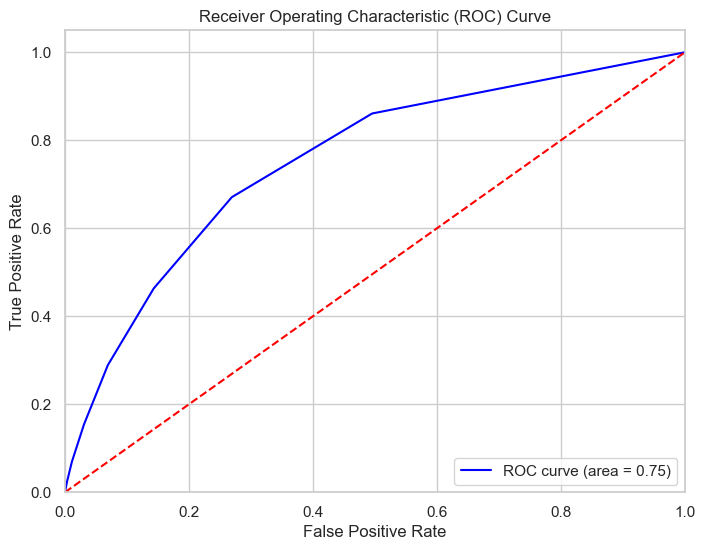

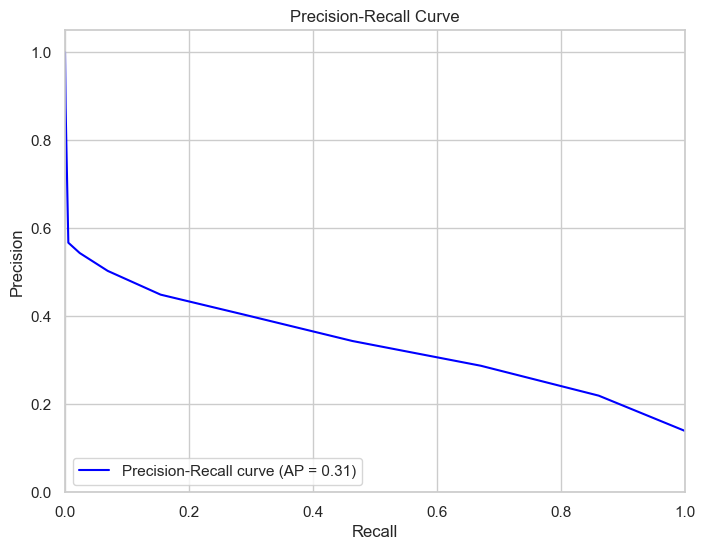

In [91]:
# Print best parameters and best score for KNN
print("KNN Best Parameters:", best_params_knn)
print("KNN Best Cross-Validation Score:", best_score_knn)
# Evaluate the model
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model(best_knn, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_knn = plot_roc_curve(best_knn, X_test, y_test)
avg_precision_knn = plot_precision_recall_curve(best_knn, X_test, y_test)
# Store results
model_results['K-Nearest Neighbors'] = {
    'Best Parameters': best_params_knn,
    'Best CV Score': best_score_knn,
    'Train Time (s)': train_time_knn,
    'Test Accuracy': accuracy_knn,
    'Test Precision': precision_knn,
    'Test Recall': recall_knn,
    'Test F1-Score': f1_knn,
    'ROC AUC': roc_auc_knn,
    'Average Precision': avg_precision_knn
}

In [94]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Define hyper parameter grid
rf_param_grid = {
    'n_estimators': [25, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_model = RandomForestClassifier(random_state=112)
best_rf, best_params_rf, best_score_rf, train_time_rf = perform_grid_search(rf_model, rf_param_grid, X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Cross-Validation Score: 0.8653963661423376
Confusion Matrix:
[[43004   663]
 [ 6146   923]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93     43667
           1       0.58      0.13      0.21      7069

    accuracy                           0.87     50736
   macro avg       0.73      0.56      0.57     50736
weighted avg       0.83      0.87      0.83     50736



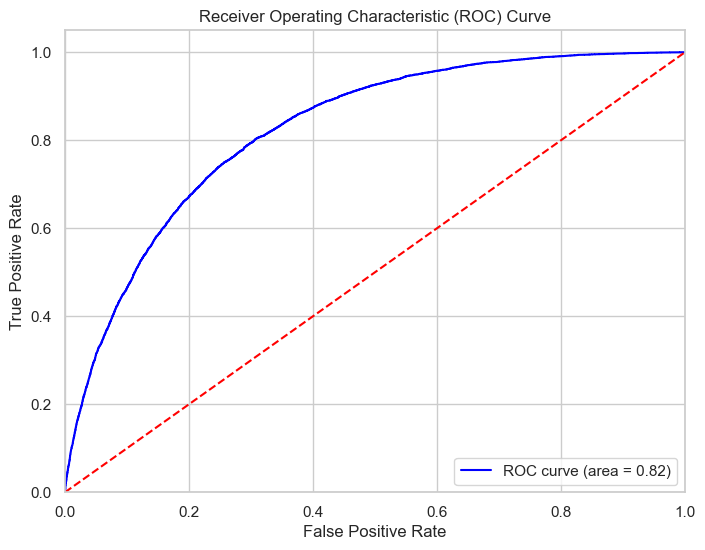

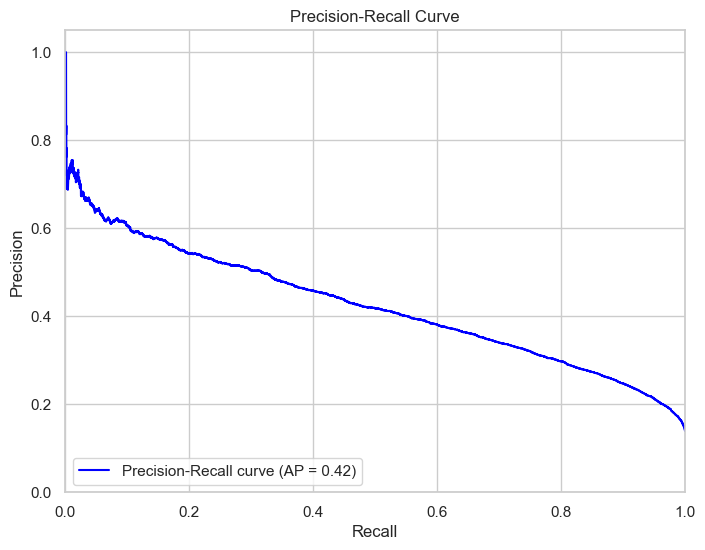

In [95]:
# Print best parameters and best score for Random Forest
print("Random Forest Best Parameters:", best_params_rf)
print("Random Forest Best Cross-Validation Score:", best_score_rf)
# Evaluate the model
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(best_rf, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_rf = plot_roc_curve(best_rf, X_test, y_test)
avg_precision_rf = plot_precision_recall_curve(best_rf, X_test, y_test)
# Store results
model_results['Random Forest'] = {
    'Best Parameters': best_params_rf,
    'Best CV Score': best_score_rf,
    'Train Time (s)': train_time_rf,
    'Test Accuracy': accuracy_rf,
    'Test Precision': precision_rf,
    'Test Recall': recall_rf,
    'Test F1-Score': f1_rf,
    'ROC AUC': roc_auc_rf,
    'Average Precision': avg_precision_rf
}

In [96]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Define hyper parameter grid
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=112)
best_gb, best_params_gb, best_score_gb, train_time_gb = perform_grid_search(gb_model, gb_param_grid, X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting Best Cross-Validation Score: 0.866189690720568
Confusion Matrix:
[[42722   945]
 [ 5760  1309]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.58      0.19      0.28      7069

    accuracy                           0.87     50736
   macro avg       0.73      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736



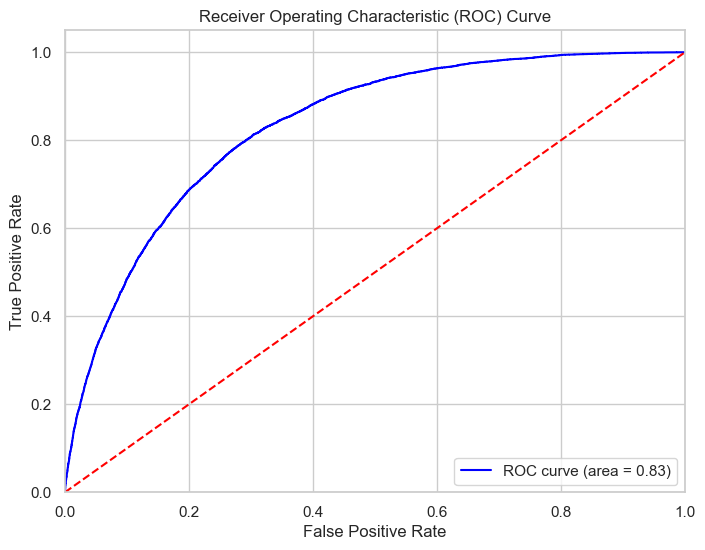

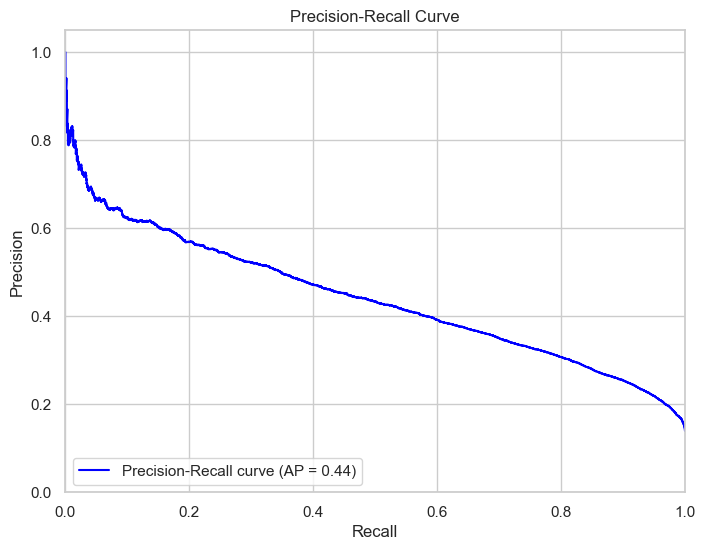

In [97]:
# Print best parameters and best score for Gradient Boosting
print("Gradient Boosting Best Parameters:", best_params_gb)
print("Gradient Boosting Best Cross-Validation Score:", best_score_gb)
# Evaluate the model
accuracy_gb, precision_gb, recall_gb, f1_gb = evaluate_model(best_gb, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_gb = plot_roc_curve(best_gb, X_test, y_test)
avg_precision_gb = plot_precision_recall_curve(best_gb, X_test, y_test)
# Store results
model_results['Gradient Boosting'] = {
    'Best Parameters': best_params_gb,
    'Best CV Score': best_score_gb,
    'Train Time (s)': train_time_gb,
    'Test Accuracy': accuracy_gb,
    'Test Precision': precision_gb,
    'Test Recall': recall_gb,
    'Test F1-Score': f1_gb,
    'ROC AUC': roc_auc_gb,
    'Average Precision': avg_precision_gb
}

In [101]:
# Neural Network
from sklearn.neural_network import MLPClassifier
# Define hyper parameter grid
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}
nn_model = MLPClassifier(max_iter=1000, random_state=112)
best_nn, best_params_nn, best_score_nn, train_time_nn = perform_grid_search(nn_model, nn_param_grid, X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Neural Network Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network Best Cross-Validation Score: 0.8645586985797917
Confusion Matrix:
[[42813   854]
 [ 5875  1194]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.58      0.17      0.26      7069

    accuracy                           0.87     50736
   macro avg       0.73      0.57      0.59     50736
weighted avg       0.84      0.87      0.83     50736



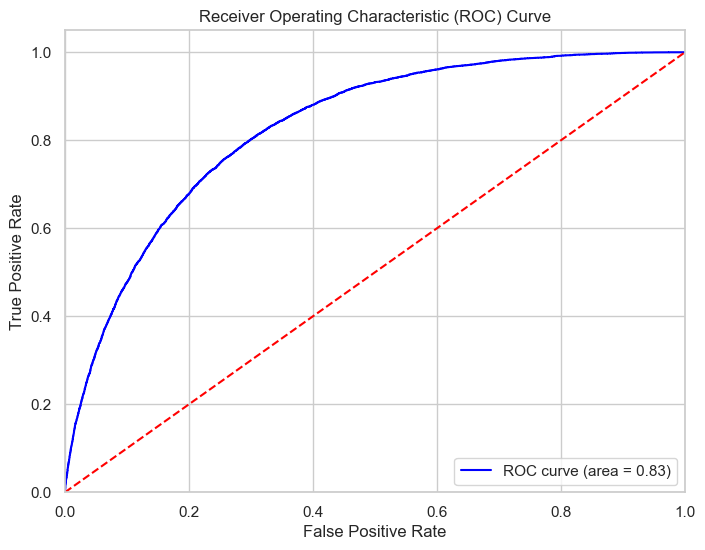

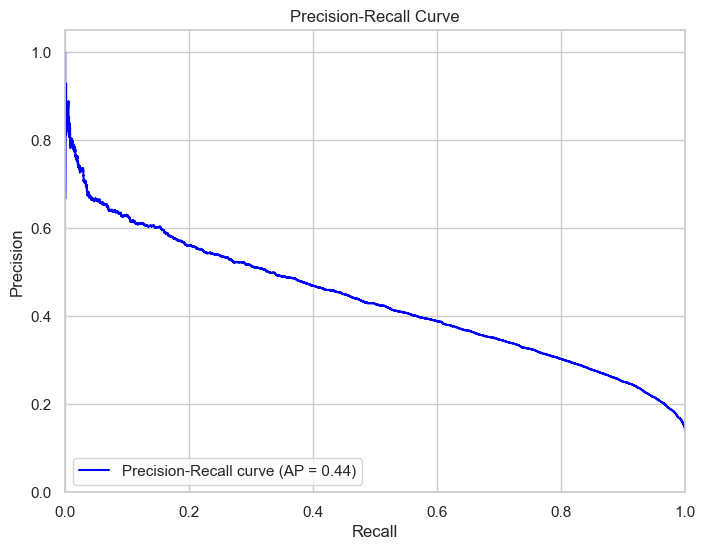

In [102]:
# Print best parameters and best score for Neural Network
print("Neural Network Best Parameters:", best_params_nn)
print("Neural Network Best Cross-Validation Score:", best_score_nn)
# Evaluate the model
accuracy_nn, precision_nn, recall_nn, f1_nn = evaluate_model(best_nn, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_nn = plot_roc_curve(best_nn, X_test, y_test)
avg_precision_nn = plot_precision_recall_curve(best_nn, X_test, y_test)
# Store results
model_results['Neural Network'] = {
    'Best Parameters': best_params_nn,
    'Best CV Score': best_score_nn,
    'Train Time (s)': train_time_nn,
    'Test Accuracy': accuracy_nn,
    'Test Precision': precision_nn,
    'Test Recall': recall_nn,
    'Test F1-Score': f1_nn,
    'ROC AUC': roc_auc_nn,
    'Average Precision': avg_precision_nn
}

In [103]:
# Summarize model results in a DataFrame
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)

                                                       Best Parameters  \
Logistic Regression                      {'C': 0.01, 'solver': 'saga'}   
K-Nearest Neighbors  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   
Random Forest        {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   
Gradient Boosting    {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
Neural Network       {'activation': 'relu', 'alpha': 0.0001, 'hidde...   

                    Best CV Score Train Time (s) Test Accuracy Test Precision  \
Logistic Regression      0.864844      11.677695      0.864909       0.551362   
K-Nearest Neighbors      0.857207       0.025572      0.855803       0.449114   
Random Forest            0.865396       4.928056      0.865795       0.581967   
Gradient Boosting         0.86619      43.914463      0.867845       0.580745   
Neural Network           0.864559      69.989464      0.867372       0.583008   

                    Test Recall Test F1-Score   ROC AUC Average Prec

### 5. Model Analysis
Now that we have prepared few different type of models and tried to find the best set of parameters for each one of them, let's focus on model output and information it tells us.

#### Accuracy
All of the models had test data accuracy in 0.85 to 0.86 region. While the number by itself is pretty good accuracy, compare to our baseline model or just picking the majority class would have given us the same accuracy. In other words, our models are not doing anything better. 

#### ROC Curve and AUC
The ROC AUC values for the most of the models are in 0.82 to 0.83 region. KNN perfomed badly on this metric and is at 0.75. Our models' score of around 0.82 falls into the "excellent" range, suggesting that it is a highly effective classifier. The models are clearly much better than random guessing at separating the positive class from the negative class. However, since we are focusing on classifying individuals with potential diabetes diagnosis, we need to look at the precision-recall to understand full picture.

#### Precision-Recall Curve and Average Precision
 - Looking at the PR curve drops rapidly toward the x-axis, meaning precision falls quickly as the model attempts to achieve higher recall. This indicates the model struggles to balance these two goals.
 - The low AP of 0.4121 is a clear warning sign. Average precision focuses specifically on the positive class (the patients with the condition) and is highly sensitive to class imbalance.
 - A low AP score indicates that while the model might correctly identify some positive cases, it also generates a large number of false positives i.e., the model's predictions for positive cases are not very reliable.

Looking further, the high imbalance of target class in our data could be one of the reason. 

### 6. Correcting models for target class imbalance

We will try various ensemble techniques to manage target class imbalance.

In [105]:
# Use balance bagging ensemble method to improve model performance
from imblearn.ensemble import BalancedBaggingClassifier
# Define base estimator
base_estimator = RandomForestClassifier(n_estimators=50, random_state=112)
# Define hyper parameter grid
bb_param_grid = {
    'n_estimators': [10, 25],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}
bb_model = BalancedBaggingClassifier(estimator=base_estimator, random_state=112)
best_bb, best_params_bb, best_score_bb, train_time_bb = perform_grid_search(bb_model, bb_param_grid, X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/s

Balanced Bagging Best Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 25}
Balanced Bagging Best Cross-Validation Score: 0.7502759329453281
Confusion Matrix:
[[32848 10819]
 [ 1860  5209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     43667
           1       0.32      0.74      0.45      7069

    accuracy                           0.75     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.86      0.75      0.78     50736



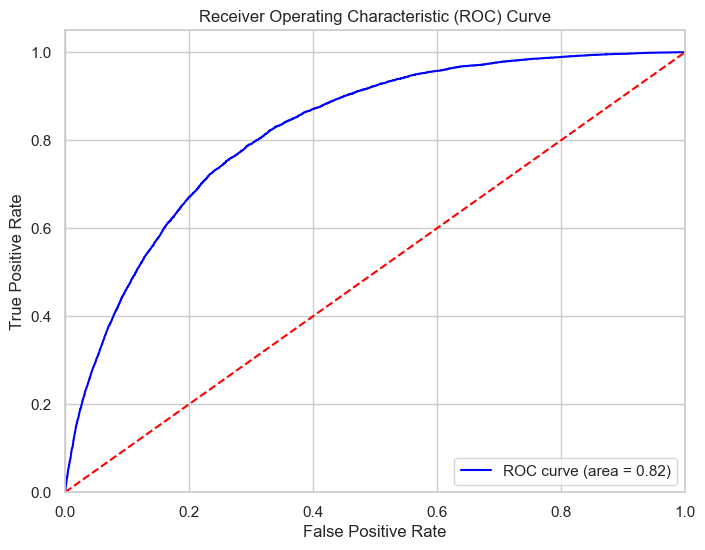

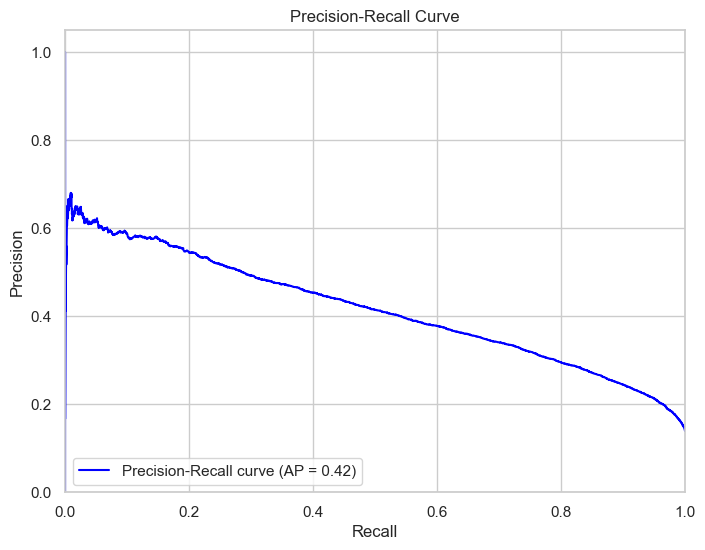

In [106]:
# Print best parameters and best score for Balanced Bagging
print("Balanced Bagging Best Parameters:", best_params_bb)
print("Balanced Bagging Best Cross-Validation Score:", best_score_bb)
# Evaluate the model
accuracy_bb, precision_bb, recall_bb, f1_bb = evaluate_model(best_bb, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_bb = plot_roc_curve(best_bb, X_test, y_test)
avg_precision_bb = plot_precision_recall_curve(best_bb, X_test, y_test)
# Store results
model_results['Balanced Bagging'] = {
    'Best Parameters': best_params_bb,
    'Best CV Score': best_score_bb,
    'Train Time (s)': train_time_bb,
    'Test Accuracy': accuracy_bb,
    'Test Precision': precision_bb,
    'Test Recall': recall_bb,
    'Test F1-Score': f1_bb,
    'ROC AUC': roc_auc_bb,
    'Average Precision': avg_precision_bb
}

In [108]:
# Use AdaBoost ensemble method to improve model performance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Define base estimator
base_estimator_ab = DecisionTreeClassifier(max_depth=1, random_state=112)
# Define hyper parameter grid
ab_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0]
}
ab_model = AdaBoostClassifier(estimator=base_estimator_ab, random_state=112)
best_ab, best_params_ab, best_score_ab, train_time_ab = perform_grid_search(ab_model, ab_param_grid, X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
AdaBoost Best Cross-Validation Score: 0.8643911644117146
Confusion Matrix:
[[42616  1051]
 [ 5782  1287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.55      0.18      0.27      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.83      0.87      0.83     50736



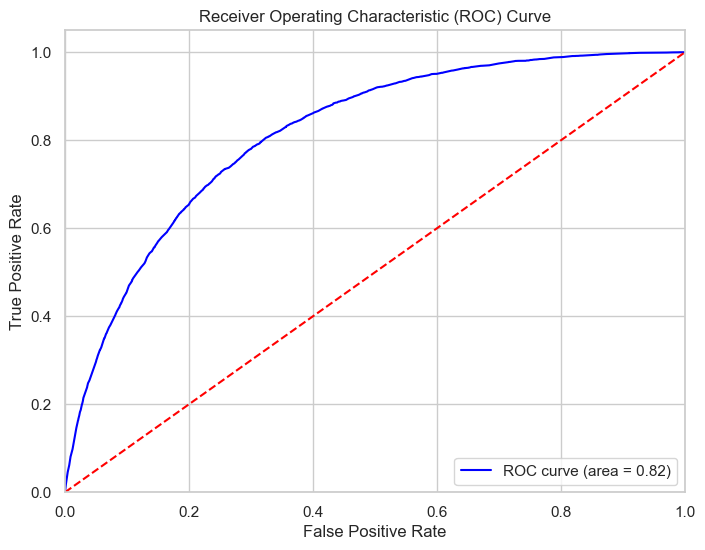

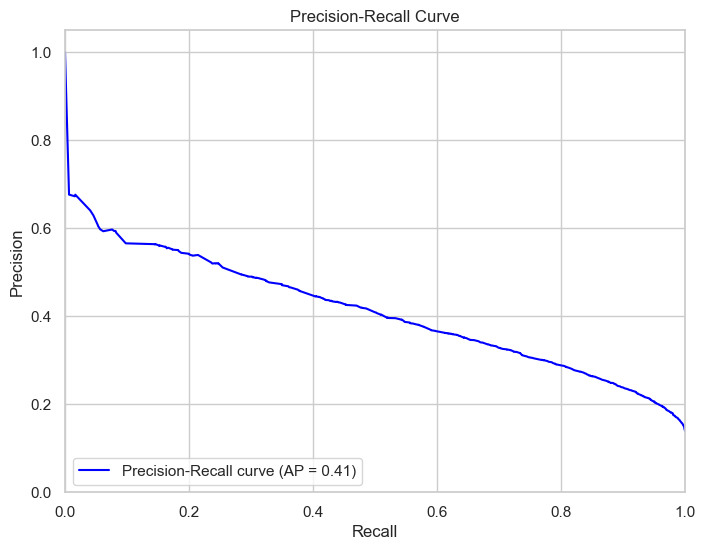

In [109]:
# Print best parameters and best score for AdaBoost
print("AdaBoost Best Parameters:", best_params_ab)
print("AdaBoost Best Cross-Validation Score:", best_score_ab)
# Evaluate the model
accuracy_ab, precision_ab, recall_ab, f1_ab = evaluate_model(best_ab, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_ab = plot_roc_curve(best_ab, X_test, y_test)
avg_precision_ab = plot_precision_recall_curve(best_ab, X_test, y_test)
# Store results
model_results['AdaBoost'] = {
    'Best Parameters': best_params_ab,
    'Best CV Score': best_score_ab,
    'Train Time (s)': train_time_ab,
    'Test Accuracy': accuracy_ab,
    'Test Precision': precision_ab,
    'Test Recall': recall_ab,
    'Test F1-Score': f1_ab,
    'ROC AUC': roc_auc_ab,
    'Average Precision': avg_precision_ab
}

In [111]:
# Install xgboost if not already installed
%pip install xgboost

# Use XGBoost ensemble method to improve model performance
from xgboost import XGBClassifier
# Define hyper parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=112)
best_xgb, best_params_xgb, best_score_xgb, train_time_xgb = perform_grid_search(xgb_model, xgb_param_grid, X_train, y_train)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ucb_py312/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_labe

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost Best Cross-Validation Score: 0.8662537451780878
Confusion Matrix:
[[42872   795]
 [ 5892  1177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.60      0.17      0.26      7069

    accuracy                           0.87     50736
   macro avg       0.74      0.57      0.59     50736
weighted avg       0.84      0.87      0.83     50736



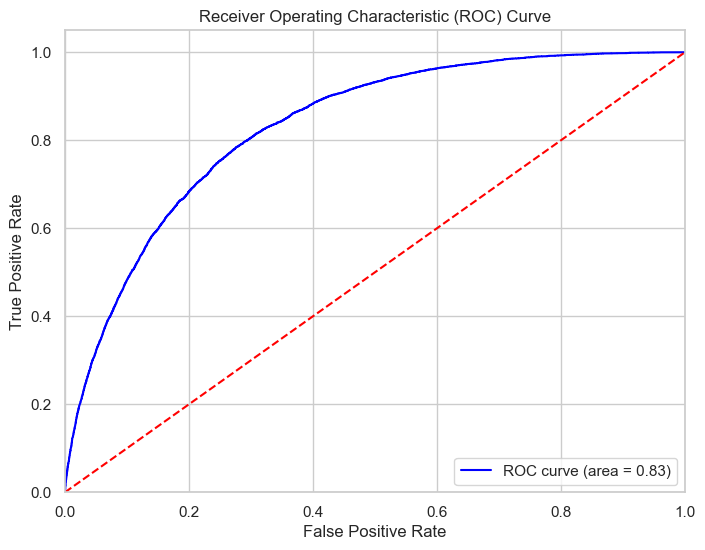

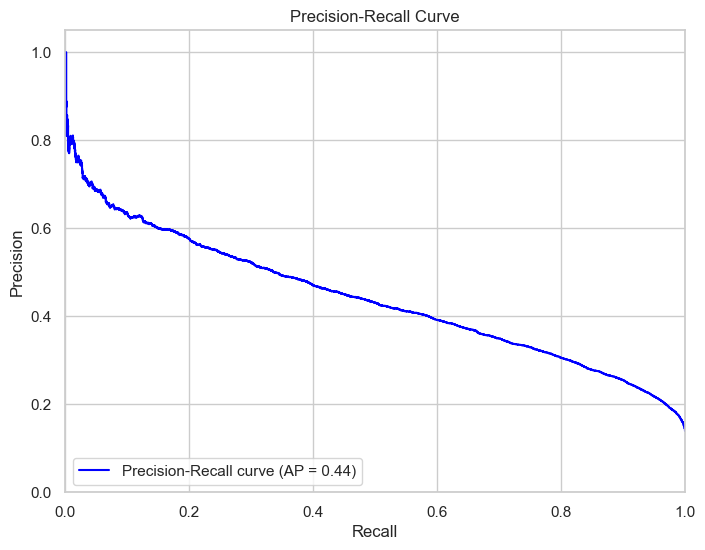

In [112]:
# Print best parameters and best score for XGBoost
print("XGBoost Best Parameters:", best_params_xgb)
print("XGBoost Best Cross-Validation Score:", best_score_xgb)
# Evaluate the model
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = evaluate_model(best_xgb, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_xgb = plot_roc_curve(best_xgb, X_test, y_test)
avg_precision_xgb = plot_precision_recall_curve(best_xgb, X_test, y_test)
# Store results
model_results['XGBoost'] = {
    'Best Parameters': best_params_xgb,
    'Best CV Score': best_score_xgb,
    'Train Time (s)': train_time_xgb,
    'Test Accuracy': accuracy_xgb,
    'Test Precision': precision_xgb,
    'Test Recall': recall_xgb,
    'Test F1-Score': f1_xgb,
    'ROC AUC': roc_auc_xgb,
    'Average Precision': avg_precision_xgb
}

In [113]:
# Summarize model results in a DataFrame
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)

                                                       Best Parameters  \
Logistic Regression                      {'C': 0.01, 'solver': 'saga'}   
K-Nearest Neighbors  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   
Random Forest        {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   
Gradient Boosting    {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
Neural Network       {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
Balanced Bagging     {'max_features': 1.0, 'max_samples': 1.0, 'n_e...   
AdaBoost                    {'learning_rate': 1.0, 'n_estimators': 50}   
XGBoost              {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   

                    Best CV Score Train Time (s) Test Accuracy Test Precision  \
Logistic Regression      0.864844      11.677695      0.864909       0.551362   
K-Nearest Neighbors      0.857207       0.025572      0.855803       0.449114   
Random Forest            0.865396       4.928056      0.865795       0.581967   
Gradient 

We are still not able to have better Average Precision. We will try to create a balance dataset and try using custom ensemble.

In [114]:
# Use SMOTE-Tomek to handle class imbalance and improve model performance
from imblearn.combine import SMOTETomek
# Apply SMOTE-Tomek to the training data
smt = SMOTETomek(random_state=112)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)
print(f"Resampled training set shape: {X_train_res.shape}, {y_train_res.shape}")
# Check the distribution of the target variable in the resampled training set
print("Resampled training set target distribution:")
print(y_train_res[target_variable].value_counts(normalize=True))

Resampled training set shape: (348334, 45), (348334, 1)
Resampled training set target distribution:
Diabetes_binary
0    0.5
1    0.5
Name: proportion, dtype: float64


In [115]:
# Use Random Forest as the base model for evaluation
rf_model_smt = RandomForestClassifier(random_state=112)
best_rf_smt, best_params_rf_smt, best_score_rf_smt, train_time_rf_smt = perform_grid_search(rf_model_smt, rf_param_grid, X_train_res, y_train_res)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Random Forest with SMOTE-Tomek Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest with SMOTE-Tomek Best Cross-Validation Score: 0.9047324190811807
Confusion Matrix:
[[41691  1976]
 [ 5534  1535]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     43667
           1       0.44      0.22      0.29      7069

    accuracy                           0.85     50736
   macro avg       0.66      0.59      0.60     50736
weighted avg       0.82      0.85      0.83     50736



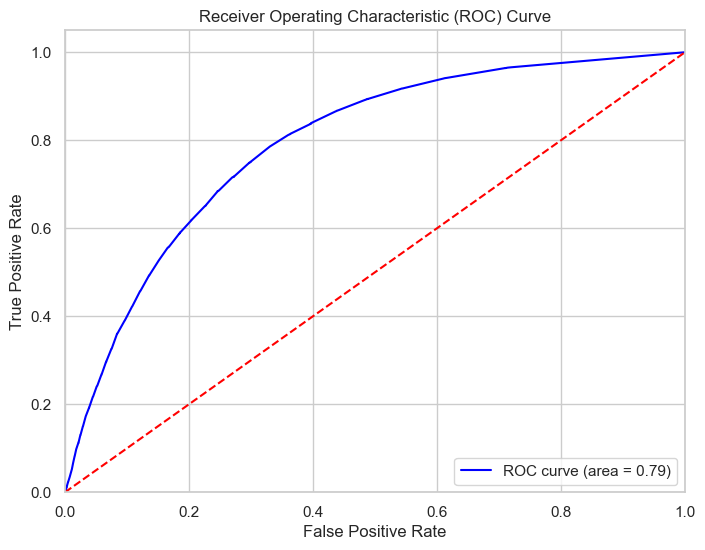

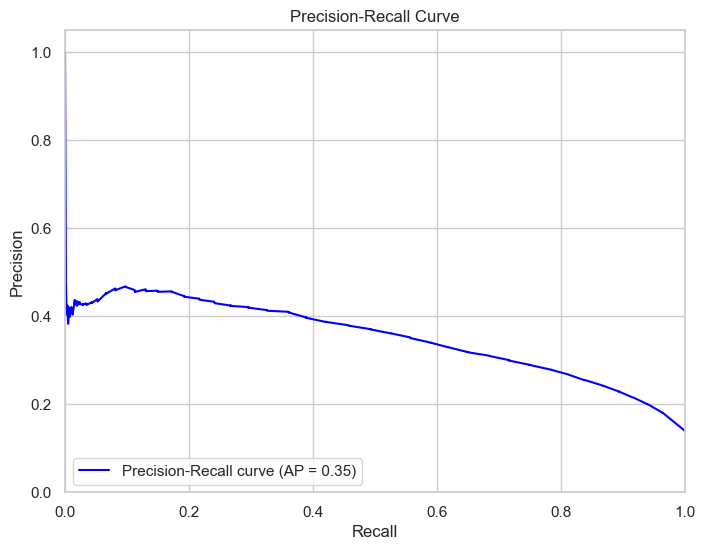

In [116]:
# Print best parameters and best score for Random Forest with SMOTE-Tomek
print("Random Forest with SMOTE-Tomek Best Parameters:", best_params_rf_smt)
print("Random Forest with SMOTE-Tomek Best Cross-Validation Score:", best_score_rf_smt)
# Evaluate the model
accuracy_rf_smt, precision_rf_smt, recall_rf_smt, f1_rf_smt = evaluate_model(best_rf_smt, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_rf_smt = plot_roc_curve(best_rf_smt, X_test, y_test)
avg_precision_rf_smt = plot_precision_recall_curve(best_rf_smt, X_test, y_test)
# Store results
model_results['Random Forest with SMOTE-Tomek'] = {
    'Best Parameters': best_params_rf_smt,
    'Best CV Score': best_score_rf_smt,
    'Train Time (s)': train_time_rf_smt,
    'Test Accuracy': accuracy_rf_smt,
    'Test Precision': precision_rf_smt,
    'Test Recall': recall_rf_smt,
    'Test F1-Score': f1_rf_smt,
    'ROC AUC': roc_auc_rf_smt,
    'Average Precision': avg_precision_rf_smt
}

In [118]:
# Create custom stacked ensemble model
from sklearn.ensemble import StackingClassifier
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=112)),
    ('gb', GradientBoostingClassifier(random_state=112)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=112))
]
# Define the stacking classifier
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), n_jobs=-1)
# Define hyper parameter grid for the final estimator
stacking_param_grid = {
    'final_estimator__C': [0.01, 0.1, 1, 10],
    'final_estimator__solver': ['liblinear', 'saga']
}
best_stacking, best_params_stacking, best_score_stacking, train_time_stacking = perform_grid_search(stacking_model, stacking_param_grid, X_train_res, y_train_res)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[22:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" }

Stacking Classifier Best Parameters: {'final_estimator__C': 0.01, 'final_estimator__solver': 'saga'}
Stacking Classifier Best Cross-Validation Score: 0.8827851114135175
Confusion Matrix:
[[40549  3118]
 [ 4774  2295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     43667
           1       0.42      0.32      0.37      7069

    accuracy                           0.84     50736
   macro avg       0.66      0.63      0.64     50736
weighted avg       0.83      0.84      0.84     50736



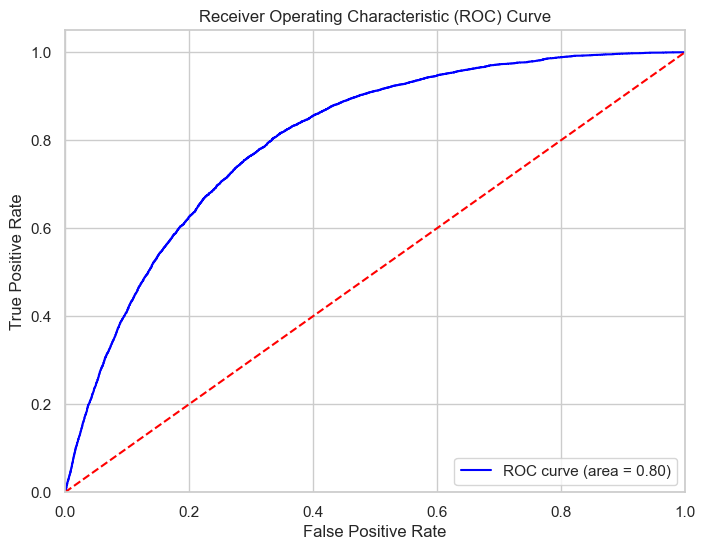

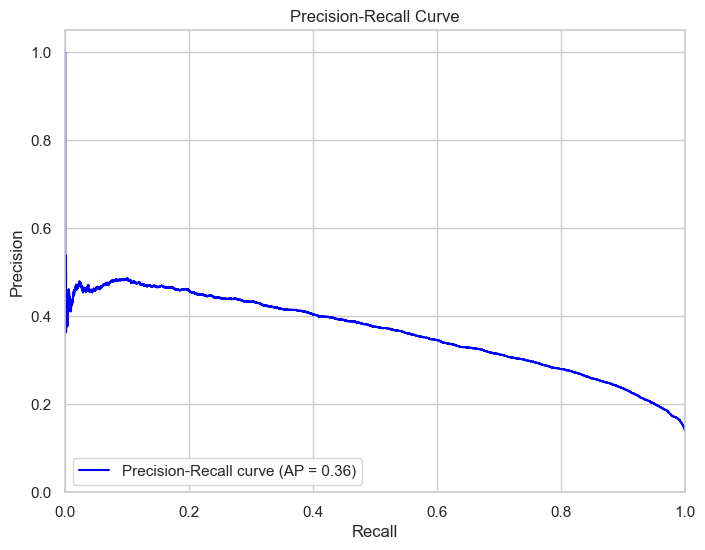

In [119]:
# Print best parameters and best score for Stacking Classifier
print("Stacking Classifier Best Parameters:", best_params_stacking)
print("Stacking Classifier Best Cross-Validation Score:", best_score_stacking)
# Evaluate the model
accuracy_stacking, precision_stacking, recall_stacking, f1_stacking = evaluate_model(best_stacking, X_test, y_test)
# Plot ROC and Precision-Recall curves
roc_auc_stacking = plot_roc_curve(best_stacking, X_test, y_test)
avg_precision_stacking = plot_precision_recall_curve(best_stacking, X_test, y_test)
# Store results
model_results['Stacking Classifier'] = {
    'Best Parameters': best_params_stacking,
    'Best CV Score': best_score_stacking,
    'Train Time (s)': train_time_stacking,
    'Test Accuracy': accuracy_stacking,
    'Test Precision': precision_stacking,
    'Test Recall': recall_stacking,
    'Test F1-Score': f1_stacking,
    'ROC AUC': roc_auc_stacking,
    'Average Precision': avg_precision_stacking
}

In [120]:
# Summarize model results in a DataFrame
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)

                                                                  Best Parameters  \
Logistic Regression                                 {'C': 0.01, 'solver': 'saga'}   
K-Nearest Neighbors             {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   
Random Forest                   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   
Gradient Boosting               {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
Neural Network                  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
Balanced Bagging                {'max_features': 1.0, 'max_samples': 1.0, 'n_e...   
AdaBoost                               {'learning_rate': 1.0, 'n_estimators': 50}   
XGBoost                         {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
Random Forest with SMOTE-Tomek  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
Stacking Classifier             {'final_estimator__C': 0.01, 'final_estimator_...   

                               Best CV Score Train Time (s) Test